In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [27]:
data = [169.6,166.8,157.1,181.1,158.4,165.6,166.7,156.5,168.1,165.3]
df = pd.DataFrame(data, columns=['TB'])
df

,TB
0,169.6
1,166.8
2,157.1
3,181.1
4,158.4
5,165.6
6,166.7
7,156.5
8,168.1
9,165.3


### Standardisasi

Standardisasi $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$ dengan $s$ = standar deviasi ddof = 0.

- High outlier jika $z_{score} > 2.5$

- Low outlier jika $z_{score} < -2.5$

Data terstandarisasi memiliki mean ~ 0 & standar deviasi ~ 1

<hr>

### 1. Standardisasi dengan sklearn preprocessing.scale

In [28]:
# menggunakan scale
z = preprocessing.scale(df['TB'], axis=0)
z

array([ 0.59381915,  0.18629621, -1.22547973,  2.26757412, -1.03627264,
        0.01164351,  0.17174181, -1.31280607,  0.37550329, -0.03201966])

In [29]:
df['Z Scale'] = z
df

,TB,Z Scale
0,169.6,0.593819
1,166.8,0.186296
2,157.1,-1.225480
3,181.1,2.267574
4,158.4,-1.036273
5,165.6,0.011644
6,166.7,0.171742
7,156.5,-1.312806
8,168.1,0.375503
9,165.3,-0.032020


In [31]:
print(df['TB'].mean())
print(df['TB'].std())

# standardisasi mean~0 & std~1 
print(df['Z Scale'].mean())
print(df['Z Scale'].std())

165.51999999999998
7.242436667923915
2.462613446496675e-15
1.0540925533894598


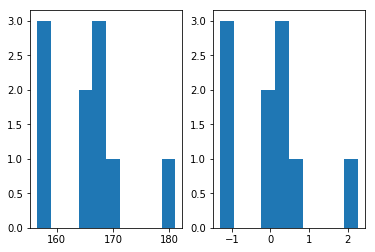

In [32]:
# standardisasi tidak merubah distribusi data
plt.subplot(121)
plt.hist(df['TB'])
plt.subplot(122)
plt.hist(df['Z Scale'])
plt.show()

<hr>

### 2. Standardisasi dengan StandarScaler

- Formula sama dengan standardisasi biasa $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$

In [33]:
# standardisasi dengan standarscaler
from sklearn.preprocessing import StandardScaler
z = StandardScaler().fit_transform(df[['TB']])
z

array([[ 0.59381915],
       [ 0.18629621],
       [-1.22547973],
       [ 2.26757412],
       [-1.03627264],
       [ 0.01164351],
       [ 0.17174181],
       [-1.31280607],
       [ 0.37550329],
       [-0.03201966]])

In [34]:
df['Z StScaler'] = z.reshape(10, )
df

,TB,Z Scale,Z StScaler
0,169.6,0.593819,0.593819
1,166.8,0.186296,0.186296
2,157.1,-1.225480,-1.225480
3,181.1,2.267574,2.267574
4,158.4,-1.036273,-1.036273
5,165.6,0.011644,0.011644
6,166.7,0.171742,0.171742
7,156.5,-1.312806,-1.312806
8,168.1,0.375503,0.375503
9,165.3,-0.032020,-0.032020


<hr>

### Best practice & Inverse Transform

In [35]:
# Alternative methods
scaler = StandardScaler()
scaler.fit(df[['TB']])
scaler.transform(df[['TB']])

array([[ 0.59381915],
       [ 0.18629621],
       [-1.22547973],
       [ 2.26757412],
       [-1.03627264],
       [ 0.01164351],
       [ 0.17174181],
       [-1.31280607],
       [ 0.37550329],
       [-0.03201966]])

In [39]:
# inverse standardize value
inverse = scaler.inverse_transform(df[['Z StScaler']])
inverse

array([[169.6],
       [166.8],
       [157.1],
       [181.1],
       [158.4],
       [165.6],
       [166.7],
       [156.5],
       [168.1],
       [165.3]])

In [40]:
df['Inverse'] = inverse.reshape(10,)
df

,TB,Z Scale,Z StScaler,Inverse
0,169.6,0.593819,0.593819,169.6
1,166.8,0.186296,0.186296,166.8
2,157.1,-1.225480,-1.225480,157.1
3,181.1,2.267574,2.267574,181.1
4,158.4,-1.036273,-1.036273,158.4
5,165.6,0.011644,0.011644,165.6
6,166.7,0.171742,0.171742,166.7
7,156.5,-1.312806,-1.312806,156.5
8,168.1,0.375503,0.375503,168.1
9,165.3,-0.032020,-0.032020,165.3
